# Desafío - Prueba de Hipótesis
### Nombre: Thomas Peet, Braulio Aguila, Camilo Ramírez
### Generación: G47
### Profesores: Alfonso Tobar - Juan Pablo Ramírez
### Fecha: 11-07-2022

### Requerimiento 1:

#### Evaluar juicios de hipótesis (2 puntos): para evaluar la pertinencia de diversas hipótesis, se te solicita discernir si es posible rechazar la hipótesis nula.  

● 75 individuos elegidos al azar fueron alcanzados por activistas pro-LGTB que se identificaron como homosexuales, y 75 alcanzados por activistas pro-LGTB que se identificaron como heterosexuales. El objetivo era medir actitudes frente a la adopción homoparental. La organización encargada de procesar los datos obtuvo los siguientes resultados:  

 ○ El 67% de los encuestados por heterosexuales se mostró a favor de la adopción homoparental, mientras que un 72% de los encuestados por activistas que se identificaron como homosexuales se mostraron a favor de la adopción homoparental.  
 ○ Asumiendo que la hipótesis nula es que ambos porcentajes no son diferentes, y la hipótesis alternativa es que existe una diferencia substancial entre ambos.  
 ○ Con p-valor de 0.1183 ¿es posible rechazar la hipótesis nula en favor de la alternativa con una confianza de 95%?, ¿Cuanta es la confianza máxima con la que sería posible rechazar la hipótesis nula en favor de la alternativa con estos resultados?  


In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### Respuesta Requerimiento 1:
En primer lugar es necesario definir nuestra hipótesis nula (HO), hipótesis alternativa (H1) y las condiciones 
que evaluaremos para fallar en rechazar o rechazar la hipótesis nula:  

- H0 : ambos porcentajes no son diferentes.
- H1 : existe diferencia sustancial entre ambos porcentajes.

pvalue > significancia = se falla en rechazar la hipótesis nula (HO)  
pvalue < significancia = se rechaza la hipótesis nula (HO)



In [69]:
#De acuerdo al enunciado nuestro pvalue es 0.1183 y la confianza de un 95%
pvalue = 0.1183
significancia = 0.05

pvalue > significancia


True

Al comprobar que nuestro pvalue es mayor a la significancia, se desprende que se falla en rechazar
la hipótesis nula (H0), por lo tanto no es posible rechazar la hipótesis nula en favor de la alternativa.
Además, la confianza  para poder rechazar la hipótesis nula tendria que ser de un 88% o menor, ya que (1 - pvalue = significancia mínima para poder rechazar HO dado este pvalue).

### Requerimiento 2:

#### Importar la base de datos utilizada la sesión presencial anterior (2 puntos):   

● Agregue una serie de variables binarias por cada continente de la variable  
region.  
Tip: Utilice np.where para ello. 

● De manera similar a la sesión anterior, enfóquese en las siguientes variables:  
○ Apellidos desde la A hasta la N: Enfocarse en las variables chldmort,  
adfert y life.  
○ Apellidos desde la N hasta la Z: Enfocarse en las variables femlab,  
literacy y school.  

### Respuesta Requerimiento 2:

In [70]:
#Se carga el dataframe "nations.csv", con el encoding respectivo y eliminando la primera columna:
df = pd.read_csv('nations.csv',encoding='ISO-8859-1', index_col=["Unnamed: 0"])
df

,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini
1,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.00,NaN
2,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.20,NaN
3,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.20,NaN
4,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.20,NaN
5,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.10,33.299999
...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Samoa,Oceania,4012.600098,10.300000,28.299999,26.75,71.533333,181600,20.666668,0.5010,98.800003,3.10,NaN
191,Solomon Islands,Oceania,2249.199951,4.500000,70.300003,36.00,66.500000,503617,17.766666,0.4858,NaN,1.40,NaN
192,Tonga,Oceania,4072.199951,10.133333,22.299999,19.25,71.833336,102550,23.266666,0.7150,99.000000,4.85,NaN
193,Tuvalu,Oceania,NaN,NaN,23.299999,36.50,66.033333,9767,49.233334,NaN,NaN,NaN,NaN


In [71]:
#Se crea un nuevo dataframe ("df_nuevo") que contiene las regiones, las columnas binarizadas 1 si pertenece el país a la región, y 0 si es que no) y las variables de interés:

#En primer lugar se asigna una variable al grupo de columnas para apellido de a hasta m, y de n hasta z. Se usa en este caso el grupo de apellidos de a hasta m:
apellidos_a_m = ["chldmort", "adfert", "life"]
apellidos_n_z = ["femlab", "literacy", "school"]
#df_apellido = df[apellidos_a_m]
df_apellido = df[apellidos_n_z]
#En segundo lugar se crean 5 columnas en donde se itera sobre la lista regiones, y en caso de que el país pertenezca a la región se asigna 1 y si es que no pertenece un 0:
regiones = df.region.unique()
df_region = df.loc[:,['country']]
for region in regiones:
    df_region[region] = np.where(df['region'] == region, 1, 0)
#Finalmente, se arma un nuevo dataframe con el país, regiones, columnas binarizadas y variables correspondientes a apellidos entre a y m:
df_nuevo = pd.concat([df_region, df_apellido], axis=1)
df_nuevo 

,country,Africa,Americas,Asia,Europe,Oceania,femlab,literacy,school
1,Algeria,1,0,0,0,0,0.4522,72.599998,6.716667
2,Benin,1,0,0,0,0,0.8482,41.700001,3.100000
3,Botswana,1,0,0,0,0,0.8870,84.099998,8.600000
4,Burkina Faso,1,0,0,0,0,0.8584,23.600000,1.300000
5,Burundi,1,0,0,0,0,1.0344,66.599998,2.483333
...,...,...,...,...,...,...,...,...,...
190,Samoa,0,0,0,0,1,0.5010,98.800003,10.300000
191,Solomon Islands,0,0,0,0,1,0.4858,NaN,4.500000
192,Tonga,0,0,0,0,1,0.7150,99.000000,10.133333
193,Tuvalu,0,0,0,0,1,NaN,NaN,NaN


### Requerimiento 3:  

#### Implementar una función de prueba de hipótesis a mano (3 puntos):    
 
● La función debe ingresar los siguientes argumentos:  
○ df:La tabla de datos.    
○ La variable a analizar.    
○ El indicador binario a utilizar.    

Tip:  
❖ Separe la variable en dos, utilizando el indicador binario. Recuerde eliminar los perdidos con dropna().  
❖ Implemente  ttest_ind de scipy.stats y guarde el valor t y pval.  
❖ Reporte las medias para cada grupo (0 y 1).  
❖ Reporte la diferencia entre las medias.  
❖ Reporte los valores t y p.   

### Respuesta Requerimiento 3:

In [72]:
from scipy.stats import ttest_ind

def test_hipotesis(df, variable, binarize):
    """ 
    Retorna media, t-statistic y p-value de una columna de interés a partir de una columna de región binarizada.

    Parámetros:
    df: dataframe a estudiar
    variable: columna asignada de estudio.
    binarize: columna de región que se encuentra binarizada.
    
    """
    #Se definen ambos casos, para la columna binarizada, cuando es 1 y 0:
    caso1 = df[df[binarize] == 1] [variable].dropna()
    caso0 = df[df[binarize] == 0] [variable].dropna()
    #Reporte del valor estadístico (t) y el p-valor:
    t,pval = ttest_ind(caso1, caso0)
    #Reporte de media de caso1, caso 2 y diferencia de ambas medias:
    medcaso1 = caso1.mean()
    medcaso0 = caso0.mean()
    diff_medias = medcaso1 - medcaso0
    #Se imprime la información solicitada:
    print(f"En cuanto a la varible '{variable}':")
    print(f"Su media cuando está en la región de {binarize} es de {medcaso1}")
    print(f"Su media cuando está fuera de la región de {binarize} es de {medcaso0}")
    print(f"La diferencia entre ambas medias es de {abs(diff_medias)}")
    print(f"El t-statistic es {t} y el p-value es {pval}")   

In [73]:
#Se prueba la función con el df (dfnuevo), una de las variables de interés (adfert) y una región (Oceania):
test_hipotesis(df_nuevo, "femlab", "Africa")

En cuanto a la varible 'femlab':
La media cuando la región Africa es 1 es de 0.7299098010156669
La media cuando la región Africa es 0 es de 0.6761015881858174
La diferencia entre ambas medias es de 0.05380821282984949
El t-statistic es 1.783872878266046 y el p-value es 0.0761771840435915


### Requerimiento 4:

#### Implementar una función que grafique los histogramas para ambas muestras (3 puntos):   

● Genere una función que devuelva un gráfico donde visualice los dos histogramas cuando la variable es 1 y 0, respectivamente.  
Tip: Refactorize la función incluyendo el método hist de matplotlib.pyplot. Incluya los argumentos alpha y label.  

● Para las tres variables de interés acorde a su grupo, analice las diferencias de medias por cada continente, y   posteriormente grafique. Concluya con los principales resultados al respecto.  

#### Respuesta Requerimiento 4:

In [82]:
def graficar_hist_clase(df, variable, binarize):
    """   
    Retorna gráfico en el que se visualiza dos histogramas cuando la variable es 1 y 0, respectivamente.

    Parámetros:
    df: dataframe a estudiar
    variable: columna asignada de estudio
    binarize: columna de región que se encuentra binarizada

    """
    sns.displot(x=variable,data=df, kde=False,aspect=2, hue=binarize, alpha= 0.3, bins = 20)
    plt.title(f"Histograma de la variable {variable} en la región de {binarize}")
    plt.xlabel(f"{variable}")
    plt.ylabel("Conteo")
    plt.legend()
    plt.show()

No handles with labels found to put in legend.


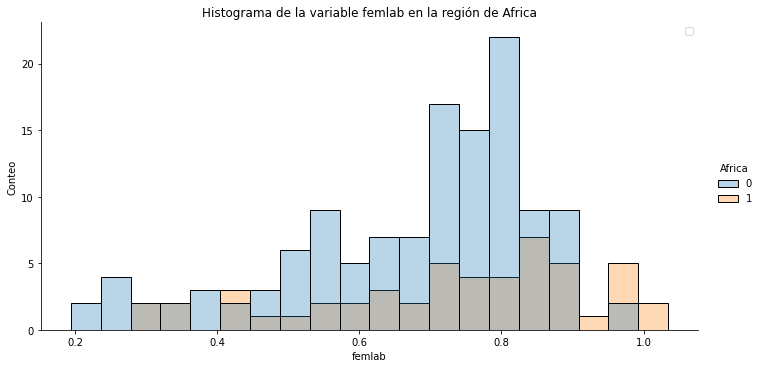

In [83]:
graficar_hist_clase(df_nuevo,'femlab','Africa');

In [ ]:

#def graficar_hist_difmed(df, variable, region):
        #caso1 = df[df[binarize] == 1] [variable].dropna()
        #caso0 = df[df[binarize] == 0] [variable].dropna()
        #medcaso1 = caso1.mean()
        #medcaso0 = caso0.mean()
        #difmed = medcaso1 - medcaso0
        #Falta iteración para cada columna de región binarizada

        #sns.catplot(x= variable, y= region, kind = "bar", data = df, ci=None, edgecolor = "black", height=4, aspect=2)
        #plt.legend()
        #plt.show()



In [ ]:
#graficar_hist_difmed(df_nuevo, "chldmort", "Oceania")